# Vector data processing

This notebook consists of an introduction to the basics of vector data processing in Python GIS ecosystem, using shapely, geopandas, and other relevant libraries. It will cover creating geometries, loading data from different sources, and saving files.

Let's start with the basics: creating basic shapes with shapely.

## Point geometries

With shapely, we first need to import the modules for each shape that you want to create (Point, LineString, Polygon). To create a point, we must import the module, create the point, and assign the coordinates:

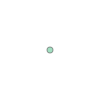

In [95]:
# Importing the library and point modules
from shapely import Point

# Creating a 2D point with coordinates
point = Point(2.2, 4.2)
point

A 3D point can also be created:

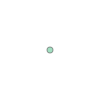

In [96]:
# A 3D point can also be created
point3D = Point(9.26, -2.456, 0.57)
point3D

The point is created, but without a coordinate reference system attached to the geometry, these coordinates are arbitrary numbers that do not represent any specific location.

The information on these points can be printed, or accessed as the .wtk character string representation of the geometry:

In [97]:
# Printing point information
print(point)
print(point3D)

# Printing WTK string
point.wkt

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


'POINT (2.2 4.2)'

Many data can be extracted from geometric objects made with *shapely*. Coordinates can be extracted using *.coords*, among others, returing the information as CoordinateSequence:

In [98]:
# Check the data type
type(point.coords)

shapely.coords.CoordinateSequence

In [99]:
# Extract the coordinates as a list
list(point.coords)

[(2.2, 4.2)]

In [100]:
# Check certain coordinates directly
print(point.x)
print(point.y)

2.2
4.2


## LineString geometries

Creating LineString objects consists of creating at least 2 points and connect them. It can be made by either a **list** of point objects, or a **tuple** of coordinates in the LineString constructor:

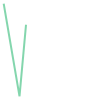

In [101]:
from shapely import LineString

# Create the points for the list
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

# Create the LineString as a list
line = LineString([point1, point2, point3])
line

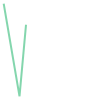

In [102]:
# Create the LineString from a tuple
line_from_tuple = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line_from_tuple

Information from a LineString object can be extracted in multiple ways:

In [103]:
# Extract the coordinates
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [104]:
# Access the X and Y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


In [105]:
# Retrieve the length of the line and its center
length = line.length
centroid = line.centroid

print('Length of the line is ' + str(length) + ' units')
print('The centroid is found in ' + str(centroid))

Length of the line is 52.46106912939557 units
The centroid is found in POINT (6.229961354035622 -11.892411157572392)


## Creating Polygon geometries

Creating polygons follows the same logic as when creating points and lines, but it needs at least 3 coordinate-tuples to form a surface:

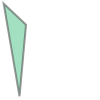

In [106]:
from shapely import Polygon
poly = Polygon([point1, point2, point3])
poly

A polygon with a hole can be created by defining the *shell* for the exterior and the (multiple) *holes* for the interior:

In [107]:
# Define exterior coordinates
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the coordinates of a single hole
holes_coordinates = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

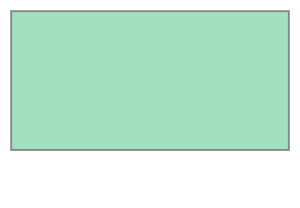

In [108]:
# Polygon without a hole
poly_without_hole = Polygon(shell=exterior)
poly_without_hole

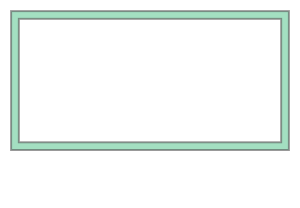

In [109]:
# Polygon with holes
poly_with_hole = Polygon(shell=exterior, holes=holes_coordinates)
poly_with_hole

As with the lines, multiple parameter information can be obtained from a Polygon:

In [110]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


Lastly, it's important to know about *box polygons*, which represent the minimum bounding box of given coordinates. *shapely.box* can be used for creating rectangular box polygons based on on minimum and maximum x and y coordinates that represent the coordinate information of the bottom-left and top-right corners of the rectangle. 

Box function is useful in many situations like, for example, when you want to select geometries from a specific area of interest. In such cases, you only need to find out the coordinates of two points on the map (bottom-left and top-righ corners) to be able create the bounding box polygon.

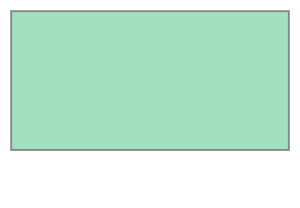

In [111]:
from shapely.geometry import box

# Define the minimum and maximum coordinates
min_x, min_y = -180, -90
max_x, max_y = 180, 90

# Create the plot
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

## Creating MultiPoint, MultiLineString and MultiPolygon geometries

Creating a collection of Point, LineString or Polygon objects is very straightforward. In the Multi-versions of these geometries, you just pass a list of points, lines or polygons to the MultiPoint, MultiLineString or MultiPolygon constructors:

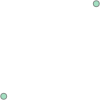

In [112]:
from shapely import MultiPoint, MultiLineString, MultiPolygon

# Creating multiple points
multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

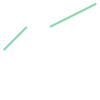

In [113]:
# Creating multiple lines
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

## Brief introduction to data structure in Geopandas

**Geopandas** is one of the core libraries for GIS analysis in Python. It extends the data structures and data analysis tools available in the *pandas* library to allow geospatial operations and the handling of coordinate reference systems.

The main data structures in geopandas are *GeoSeries* and *GeoDataFrame*, which extend the capabilities of the Series and DataFrame data structures of *pandas*. A *GeoDataFrame* is like a *pandas* DataFrame that contains at least one dedicated column for storing geometries, and the geometry column is a *GeoSeries* which contains the geometries as *shapely* objects (points, lines, polygons,...). 

#### Reading a file

Let's start using Geopandas with an exercise. The required data can be downloaded [here](https://github.com/Python-GIS-book/site/blob/master/source/part2/chapter-06/nb/data/Austin/austin_pop_2019.gpkg). Let's start by loading it and checking that it is a GeoDataFrame object:

In [114]:
# Import required packages
from pathlib import Path
import geopandas as gpd

# Define the data path and read it
data_folder = Path("data", "Austin")
fp = data_folder / "austin_pop_2019.gpkg"
print(fp)

data = gpd.read_file(fp)


data\Austin\austin_pop_2019.gpkg


In [115]:
# Check that the data type is correct (GeoDataFrame)
type(data)

geopandas.geodataframe.GeoDataFrame

In [116]:
# Check the first rows of the data
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


Next, let's plot the data to form an Austin map:

<Axes: >

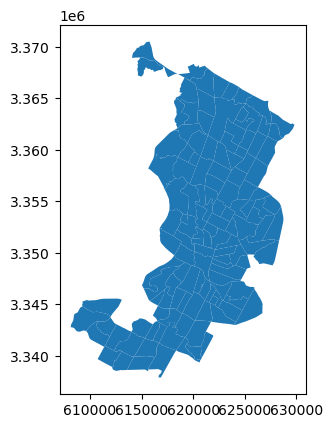

In [117]:
# Plot the Austin data
data.plot()

#### Geometries in geopandas

*Geopandas* looks for the geometries from an attribute called **.geometry**, which is, by default, a column in the GeoDataFrame. However, a GeoDataFrame can have multiple columns containing geometrical information. This .geometry information can be checked:

In [118]:
# See the first entries
data.geometry.head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [119]:
# Check the data type of the .geometry attribute
type(data.geometry)

geopandas.geoseries.GeoSeries

As we can see here, the geometry attribute contains polygon geometries stored in a GeoSeries data structure. Let’s proceed and extract information about the area (in square meeters) of each census tract polygon. Extracting the area for all geometries in our data can be done easily by calling the attribute *.area*, which is part of the GeoDataFrame object. Let's do this and then transform it to square kilometers and store it in a new column (area_km2):

In [120]:
# Extracting the area for all geometries
data.area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

In [121]:
# Transforming into square km in a new column
data["area_km2"] = data.area / 1000

# Check the transformation
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4029.771797
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1532.029989
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3960.343857
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2181.761674
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2431.208488


Let's see this transformation visually, creating the same previous plot but with each polygon with a color depending on its area value:

<Axes: >

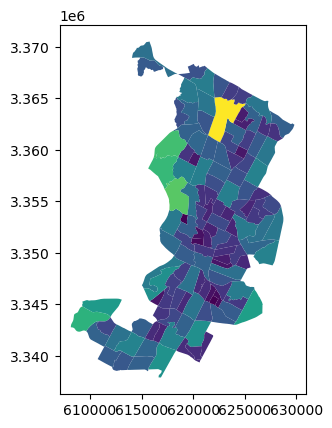

In [122]:
# Plot with the color based on the area_km2 column
data.plot(column="area_km2")

Or, as another example, let's create a new column based on the average population density for each polygon, and plotting it:

<Axes: >

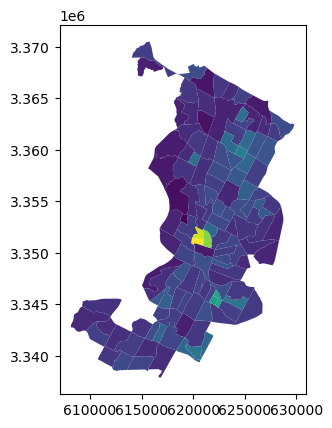

In [123]:
# Creating the new average population density column for square km
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

# Plot with the color based on the pop_density_km2 column
data.plot(column="pop_density_km2")

#### Writing data into a file

In a similar way as reading data, writing the contents of a GeoDataFrame into a specific file is one of the most typical operations when working with geographic data. It is possible to export the GeoDataFrame into various data formats using the *.to_file()* method. To do it, we need to pass the filepath to the output file. For the most common geospatial file formats (e.g. GPKG, ESRI Shapefile, GeoJSON, GML, MapInfo File, FlatGeobuf), geopandas automatically identifies the correct file format based on the file extension that has been written after the dot in the file path. Let's save a previous example:

In [124]:
# Create an output path for the data
output_fp = "data/Austin/austin_pop_density_2019.gpkg"

# Write the file
data.to_file(output_fp)

And the data is saved in a new file named "austin_pop_density_2019.gpkg". It can be saved in other formats using the *driver* parameter to specify the output format.

In [125]:
# Create an output path for the data
output_fp = "data/Austin/austin_pop_density_2019.fgb"

# Write the file in FlatGeobuf format
data.to_file(output_fp, driver="FlatGeobuf")

#### Reading vector data

Many (around 80) different GIS data formats can be directly read with *geopandas*, which uses another library called *pyogrio* to read it. With it, it does not matter which of these formats are you using, the code to read it is the same:

In [126]:
# Import pyogrio
import pyogrio

# Read file from Geopackage
fp = data_folder / "austin_pop_2019.gpkg"
data = gpd.read_file(fp)

You can also read data directly from a **.zip** file, which is specially useful for large datasets or for a collection of multiple files. It is done by using a library called *zipfile*. Let's run an example after downloading [this](https://github.com/Python-GIS-book/site/tree/master/source/part2/chapter-06/nb/data/Helsinki) data.

In [127]:
# Import libary
from zipfile import ZipFile

# Define path
fp = "data/Helsinki/building_points_helsinki.zip"

# Open the file as a variable named 'z'
with ZipFile(fp) as z:
    print(z.namelist())

['building_points_helsinki.gpkg']


This zip file contains a single vector data file, which makes it easy to read as:

In [128]:
# Read the file
buildings = gpd.read_file(fp)
buildings.head(2)

,name,geometry
0,None,POINT (24.85584 60.20727)
1,Uimastadion,POINT (24.93045 60.18882)


However, many times multiple files and folders are stored in the zip file, as you can see in the next example:

In [129]:
# Define path
fp = "data/Helsinki/Kamppi_layers.zip"

# Open the file as a variable named 'z'
with ZipFile(fp) as z:
    print(z.namelist())

['natural/', 'natural/Kamppi_parks.gpkg', 'built_environment/', 'built_environment/Kamppi_buildings.gpkg', 'built_environment/Kamppi_roads.gpkg']


This zip contains two folders (_'natural/'_ and _'built_environment/'_) with 3 files in total. To be able to read the contents of these files, we need to create a filepath that points to a given file inside the ZIP archive considering the folder structure. This can be done easily with a special syntax in which we separate the actual filepath to the ZIP file on a local disk with the **!** character from the folder and file structure inside the archive as follows:

In [130]:
# Define path
parks_fp = "data/Helsinki/Kamppi_layers.zip!natural/Kamppi_parks.gpkg"

# Open the file as a variable named 'z'
parks = gpd.read_file(parks_fp)
parks.head(2)

,osmid,leisure,name,geometry
0,8042256,park,Pikkuparlamentin puisto,"POLYGON ((385464.223 6672281.159, 385464.274 6..."
1,8042613,park,Simonpuistikko,"POLYGON ((385532.543 6672073.355, 385490.887 6..."


Here, the _data/Helsinki/Kamppi_layers.zip_ part of the filepath points to the location of the ZIP file on the disk, whereas the _!natural/Kamppi_parks.gpkg_ part corresponds to the structure inside the archive and points to the file that we want to read (_Kamppi_parks.gpkg_). This works similarly regardless of how many subfolders you have inside the ZIP file as long as the ! character is used to differentiate the contents of the archive from the location of the ZIP file stored on your computer. If you don’t have subfolders inside the ZIP archive but have multiple files stored at the root of the archive, you would just modify the filepath accordingly without the subfolder.

## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using shapely’s geometric objects and geopandas. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into geospatial data layers. Let’s create a simple GeoDataFrame based on coordinate information that represents the outlines of the Senate square in Helsinki, Finland. The coordinates demonstrates its corners, which we can use to create a Polygon object. The order of the coordinates should always follow longitude-latitude order (i.e. x and y coordinates):

In [131]:
# Define the four cornes
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

# Create the polygon
poly = Polygon(coordinates)

Once the polygon is defined, we can use it to create a GeoDataFrame object with geopandas. Data can be passed in as a list-like object, which, in this case, we will only have one row and one column. We can pass the polygon inside a list, and specify that this data is stored into a column called geometry so that geopandas will know to use the contents of that column as the source for geometries. 

In [132]:
# Define the new GeoDataFrame object through a list
newdata = gpd.GeoDataFrame(geometry=[poly])
newdata

,geometry
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,..."


<Axes: >

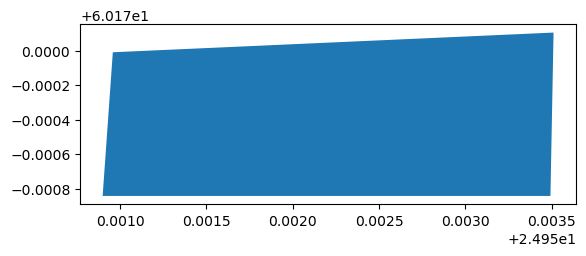

In [133]:
# Plot it
newdata.plot()

In this way, we can easily create a GeoDataFrame without any attribute data. However, it is important to attach attribute information along with the geometry. We can create a GeoDataFrame from scratch with multiple attributes by passing a Python dictionary into the GeoDataFrame object as follows:

In [134]:
gdf_data = {
    "geometry": [poly],
    "name": "Senate Square",
    "city": "Helsinki",
    "year": 2023,
}
new_data_extended = gpd.GeoDataFrame(gdf_data)
new_data_extended

,geometry,name,city,year
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,...",Senate Square,Helsinki,2023


#### Creating a GeoDataFrame from a text file

It can happen that you receive data that has coordinates, but they are stored in a delimited textfile, Excel, or something else. In this case, you cannot directly read the data into GeoDataFrame from the text file, but it needs to be converted into geospatial data using the coordinate information. In such a case, we can make use of the pandas, geopandas and shapely libraries for turning the data from a text file into a fully functional GeoDataFrame. To demostrate it, [this data](https://github.com/Python-GIS-book/site/tree/master/source/part2/chapter-06/nb/data/Airports) that contains point coordinates of airports. The operation of turning this data into a GeoDataFrame begins with reading the data with pandas into a DataFrame:

In [135]:
# Import Pandas
import pandas as pd

# Read the .txt file
airports = pd.read_csv(
    "data/Airports/airports.txt",
    usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"],
)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [136]:
# Check the data type
type(airports)

pandas.core.frame.DataFrame

The data has successfully been transformed from a text file into a regular dataframe. This data contains columns for the latitude and longitude coordinates of the airports, which means that we can convert the data into a GeoDataFrame object. There is a function in geopandas called **.points_from_xy()** for generating an array of Point objects based on x and y coordinates. This function assumes that x-coordinates represent longitude and the y-coordinates represent latitude. 

First, we create a new column called geometry into the DataFrame and used the .points_from_xy() function to turn the coordinates into shapely Point objects. At this stage, the data will still be in a DataFrame format. Secondly, we convert the pandas DataFrame into a GeoDataFrame, which then has all the capabilities and tools bundled with geopandas:

In [137]:
# Convert the longitude and latitude data into coordinates for the dataframe
airports["geometry"] = gpd.points_from_xy(
    x=airports["Longitude"], y=airports["Latitude"]
)

# Connvert the dataframe into a GeoDataFrame
airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.5698)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22 -9.44338)


In [138]:
type(airports)

geopandas.geodataframe.GeoDataFrame

After these two steps, we have succesfully turned the data into geospatial format and we can for example plot the data on a map:

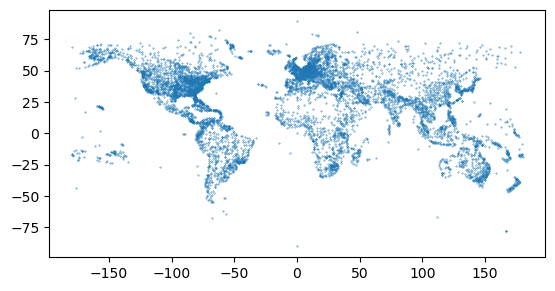

In [139]:
airports.plot(markersize=0.1);